# Recap: 


## Model: 
$$\Phi\left(x,y,\epsilon,\eta\right)=\beta_{11}x_{1}y_{1}+\beta_{12}x_{1}y_{2}+\beta_{21}x_{2}y_{1}+\beta_{22}^{u}x_{2}y_{2}+\beta_{13}^{u}x_{1}\eta+\beta_{31}^{u}y_{1}\epsilon+\beta_{33}^{d}\epsilon\eta$$
$$ \Phi^{u}\left(x,y,\epsilon,\eta\right)=\beta_{11}^{u}x_{1}y_{1}+\beta_{12}^{u}x_{1}y_{2}+\beta_{21}^{u}x_{2}y_{1}+\beta_{22}^{u}x_{2}y_{2}+\beta_{31}^{u}y_{1}\epsilon+\beta_{13}^{u}x_{1}\eta$$
$$\Phi^{d}\left(x,y,\epsilon,\eta\right)=\beta_{11}^{d}x_{1}y_{1}+\beta_{12}^{d}x_{1}y_{2}+\beta_{21}^{d}x_{2}y_{1}+\beta_{33}^{d}\epsilon\eta $$

The observed and unobserved characteristics are distributed according to Log-Normal distributions. The parameters of the unobserved distributions are fixed and known. 

## Previous MC Results: 
The bias and the RMSE of the coefficients of the unobservable terms and the equilibrium selection parameter were unreasonably large. That is the parameters $ \beta_{31}^u, \beta_{33}^d$, and the minimum of the downstream profits. 

# Questions: 
1. How does BlackBoxOptim perform in finding the global maximum in likelihood maximization? Does it converge to the same point if the optimizer is run many times on the same dataset?
2. Equilibrium Selection Rule: Does changing the equilibrium selection affect the performance of the estimator? For instance changing the rule from the minimum downstream profit to the median or the mean. 
3. How does the estimator perform in lower dimensions?



# (1) Does BlackBoxOptim converge to the same point? 

**Summary:** *It seems that increasing the dimension of the parameter space worsens the performance of the differential evolution algorithm in the BlackBoxOptim. It is reasonable to assume that in 10 dimensional search, the optimizer converges to a local maximum. For one, two, and three dimensional search it is rare that different instances of optimization converge to different points.* 

For one, two, and three dimensional search the differential evolution algorithm in BBOptim converge to the same point. 


For the same realization of a fake dataset, I start the optimizer 24 times to solve the same likelihood maximization problem. All instances converge to the same point (upto an error in the magnitude of 1e-8). I have tried this for different firm numbers, and number of simulations in each likelihood evaluation. 

However, when the dimension increases to 5, we start seeing the optimizer failing in some instances. 


The last column is the negative of the likelihood function, (smaller number is better). Only 5 out of 24 optimization instance converge to the lowest value. 
```
24×6 Matrix{Float64}:
 2.00466  1.83933   3.6713    -11.9599     2.81544  1.31311
 2.69604  2.23001   0.839862   -4.44521   11.3944   1.32754
 2.71533  2.22639   0.817742   -4.45667   11.388    1.32709
 2.00464  1.83932   3.6714    -11.9601     2.81929  1.3131
 2.74902  2.22511   0.923364   -4.4645    11.4181   1.33082
 3.05464  1.70812   4.28104   -11.273      4.27198  1.32353
 2.71935  2.24821   0.773723   -5.43709   10.4347   1.33308
 5.35539  1.78648  11.0079    -14.506      3.55683  1.32463
 5.3554   1.78647  11.0079    -14.506      3.55671  1.32463
 5.35546  1.78648  11.0079    -14.5061     3.55672  1.32463
 2.00473  1.83933   3.6713    -11.9602     2.81999  1.3131
 5.03922  1.76115  11.1217    -14.5602     3.2037   1.32233
 2.00468  1.83933   3.67129   -11.96       2.81993  1.3131
 5.09004  1.74992  10.2151    -14.1891     3.53877  1.32474
 5.3554   1.78647  11.0078    -14.5059     3.55712  1.32463
 2.71606  2.22635   0.815546   -4.4557    11.3895   1.32709
 5.35566  1.78649  11.0084    -14.5074     3.55552  1.32463
 2.69663  2.22995   0.83844    -4.44538   11.3945   1.32752
 5.35598  1.78657  11.008     -14.5065     3.55676  1.32463
 2.00466  1.83933   3.67128   -11.9598     2.82075  1.3131
 2.71935  2.24821   0.773726   -5.43709   10.4346   1.33308
 2.23561  1.60246   0.167694   -0.843119  13.8743   1.32156
 5.35541  1.78648  11.0078    -14.5058     3.55745  1.32463
 2.99234  1.81417   5.30494     0.135157  15.988    1.33209
 
 ```
 Changing the population size parameter in the algorithm, from 50 to 100, and running another 24 optimization problems does not change much. This time 6 out of the 24 achieve the objective value of 1.31. 
 ```
 24×6 Matrix{Float64}:
 2.74565  2.20917   0.908761   -4.3725   11.4955   1.33092
 5.08921  1.74989  10.2138    -14.1864    3.53521  1.32475
 5.09245  1.75027  10.2189    -14.1912    3.53975  1.32474
 1.98992  1.84375   3.85368   -12.1658    2.58641  1.31292
 2.02025  1.83921   3.67461   -12.0409    2.75205  1.31354
 2.70806  2.22857   0.814561   -4.4462   11.3961   1.32723
 5.36297  1.78741  11.0101    -14.5139    3.55965  1.32464
 5.09048  1.75021  10.2214    -14.1984    3.52757  1.32475
 5.03662  1.75758  11.0752    -14.4142    3.36381  1.32415
 2.04626  1.84264   3.47016   -11.5498    3.25516  1.31574
 5.36941  1.7883   11.0094    -14.5136    3.56588  1.32465
 2.93157  1.7399    4.12713   -10.4076    5.10376  1.33577
 5.38086  1.78805  11.2711    -14.6283    3.46621  1.3218
 5.34781  1.78574  10.9997    -14.4816    3.57447  1.32467
 2.00418  1.83917   3.67288   -11.9661    2.81802  1.31316
 2.71934  2.24818   0.77366    -5.4369   10.4356   1.33308
 1.87437  1.55187   0.502445   -3.50872  10.6758   1.32036
 5.35812  1.78683  11.0131    -14.5125    3.55459  1.32464
 2.01319  1.84018   3.71235   -12.0639    2.72718  1.31362
 5.36018  1.78678  11.0173    -14.5333    3.53518  1.32463
 5.08624  1.74978  10.2093    -14.178     3.54329  1.32474
 5.08872  1.75001  10.2135    -14.1888    3.5381   1.32474
 5.351    1.78626  10.9973    -14.4757    3.58335  1.32467
 1.95543  1.5628    0.336392   -4.14158  10.1725   1.31657
```

Increasing the nubmer of simulations from 25 to 50, again 5 out of 24 converge to the minimum of 1.26. 
```
24×6 Matrix{Float64}:

 4.1486   1.77846  -3.43681   -2.53421  14.4313   1.27115
 3.42648  1.79872  -2.95138   -3.39366  12.8771   1.27488
 3.43381  1.78293  -3.31874   -6.28217   9.99209  1.26986
 2.70553  1.84951   4.27463   -8.75632   6.64063  1.26885
 3.83436  1.83565  -3.50006   -2.76025  13.9857   1.27576
 2.81999  1.90471   4.36352  -11.0047    4.55359  1.27247
 2.73899  1.92199   4.74309  -11.3957    4.14525  1.27161
 3.17738  1.9177    4.97365  -12.4095    3.50958  1.28821
 2.45845  1.71628  -1.84523   -4.96797  10.1241   1.26017
 2.67833  1.86955   4.33777   -9.73392   5.64039  1.27503
 3.52012  1.78412  -3.08619   -3.17589  13.1862   1.27556
 2.72477  1.86336   3.95521   -8.92028   6.51606  1.27468
 2.88332  1.91703   4.68147  -11.2468    4.38774  1.26843
 3.98888  1.83272  -3.74334   -3.43253  13.4991   1.28861
 3.63273  1.80213  -3.73241   -3.59692  12.9216   1.29585
 2.70935  1.9289    4.86757  -11.1983    4.27229  1.27036
 2.65593  1.85525   4.21353   -8.78972   6.55204  1.26718
 2.36704  1.81653  -1.508     -5.64989   9.49301  1.27819
 2.42805  1.65899  -1.5278    -4.86518  10.1187   1.27577
 2.75652  1.90168   4.5139   -10.1389    5.35002  1.27375
 2.45863  1.73124  -1.84975   -5.15949   9.96064  1.26241
 2.76222  1.90596   4.91773  -11.8193    3.67688  1.27038
 3.72865  1.79894  -3.36907   -3.41977  13.1824   1.27939
 3.40558  1.81952  -2.99297   -3.67273  12.6088   1.28453
```

## 25 firms, 25 simulations: all parameters except the last three are fixed at the truth.
15 out of 24 converge to the apparent global minimum.

```
24×4 Matrix{Float64}:
 4.04913  -4.68111  1.59584  0.165887
 4.68001  -2.98653  3.25686  0.100893
 4.19639  -4.35942  1.88842  0.160474
 4.04913  -4.68111  1.59584  0.165887
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.04913  -4.68111  1.59584  0.165887
 4.68001  -2.98653  3.25686  0.100893
 4.04913  -4.68111  1.59584  0.165887
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.96984  -3.40006  2.82645  0.159761
 4.19639  -4.35942  1.88842  0.160474
 4.19639  -4.35942  1.88842  0.160474
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.04913  -4.68111  1.59584  0.165887
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.68001  -2.98653  3.25686  0.100893
 4.04913  -4.68111  1.59584  0.165887
 ```
 
 ## 25 firms, 25 simulations, optimizing over all 10 parameters
I allowed for all 24 optimization instances to perform more than 500,000 function evaluations to make sure that I am not prematurely stopping the optimizer.  The lowest value of objective is $0.01165$ and 5 out of 24 optimization instances achieve this value and the corresponding parameter values. The other simulation instances converge to a nearby points. 
 ```24×11 Matrix{Float64}:
 -2.43883  1.01246   -1.59659  -0.280923    2.76612   0.344588   1.56173   0.639596   -0.535667    2.73849  0.0161485
 -2.51674  0.93142   -1.58302  -0.229397    2.78421   0.0942871  1.55319   0.444645   -0.43755     2.59938  0.0147939
 -2.84005  0.906904  -1.52794  -0.0336114   2.91331  -0.687949   1.51769   0.0151777   0.00663128  2.39115  0.0520643
 -2.5086   0.929826  -1.59195  -0.231411    2.78793   0.117593   1.56349   0.450789   -0.461674    2.61656  0.0116518
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.52194  0.921724  -1.58948  -0.00592192  2.81817   0.095895   1.58884  -0.568457   -0.079878    3.04318  0.065167
 -2.5001   0.948372  -1.57495  -0.24711     2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.51674  0.93142   -1.58302  -0.229397    2.78421   0.0942872  1.55319   0.444645   -0.43755     2.59938  0.0147939
 -2.03302  0.613483  -2.06786  -0.16116     2.44476   0.664597   2.01848   0.0546323  -0.00721506  3.81338  0.029326
 -2.28428  0.593598  -1.60968  -0.0987309   2.68498   0.668909   1.61416   0.76828    -0.476817    3.11634  0.10687
 -2.5001   0.948372  -1.57495  -0.24711     2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.5086   0.929826  -1.59195  -0.231411    2.78793   0.117593   1.56349   0.450789   -0.461674    2.61656  0.0116518
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.4778   0.984109  -1.58807  -0.27382     2.78497   0.229362   1.55287   0.538548   -0.523504    2.64067  0.0123899
 -2.5086   0.929825  -1.59195  -0.231411    2.78793   0.117593   1.56349   0.450789   -0.461674    2.61656  0.0116518
 -2.5086   0.929826  -1.59195  -0.231411    2.78793   0.117593   1.56349   0.450789   -0.461674    2.61656  0.0116518
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.5001   0.948372  -1.57495  -0.24711     2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.51902  0.802915  -1.51745  -0.212856    2.92102   0.205354   1.50282   0.746123   -0.671117    2.55955  0.0619911
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 -2.5086   0.929826  -1.59195  -0.231411    2.78793   0.117593   1.5635    0.450789   -0.461674    2.61656  0.0116518
 -2.53231  0.925316  -1.46891  -0.225198    2.96252   0.661457   1.45984   1.21832    -1.1526      2.52521  0.060447
 -2.5001   0.948372  -1.57495  -0.247109    2.77781   0.144087   1.54333   0.482854   -0.473696    2.58803  0.0125368
 ```
 
 
 
 
 ## 50 firms, 50 simulations, all 10 parameters
 ```
 24×11 Matrix{Float64}:
 -2.50888  0.668077  -1.64471   -0.289479  2.65594  0.881276   1.64297    0.785434   -0.390926    3.49103  -0.392564
 -3.41967  1.04272   -0.923014  -0.421545  3.65985  0.682922   0.889188   0.195081   -1.11123     2.78985  -0.320691
 -2.61213  0.779587  -1.55444   -0.409749  2.74878  0.521599   1.51964   -0.0640061  -0.273335    3.22325  -0.4001
 -2.41442  0.453943  -1.74244   -0.255326  2.55038  0.328174   1.70687   -0.280499   -0.0267379   3.2527   -0.356623
 -3.49131  1.64881   -0.823562  -0.785533  4.0882   1.00867    0.656909   0.0677971  -0.279197    4.15269  -0.286133
 -2.68748  0.991205  -1.45092   -0.467424  3.202    0.728774   1.36363    0.710414   -1.15525     2.84819  -0.392079
 -2.62509  0.378726  -1.56773   -0.150215  2.71229  0.0322596  1.54354   -0.244822    0.0403583   3.01769  -0.298962
 -2.56457  0.317205  -1.64028   -0.059512  2.69213  0.192406   1.63165   -0.285857    0.0169954   3.23783  -0.368714
 -2.61006  0.349819  -1.6468    -0.128607  2.66711  0.116753   1.64266   -0.192671   -0.0196248   3.10113  -0.387474
 -2.89525  0.578799  -1.37761   -0.185553  3.08822  0.387521   1.34493    0.17749    -0.00963119  3.53636  -0.357218
 -2.85852  1.85719   -1.29307   -1.51847   3.00957  0.214898   1.24265    0.417979    0.308454    3.43558  -0.0413213
 -2.59151  1.2909    -1.40494   -0.519677  3.48865  1.46342    1.25661   -0.860409   -0.207546    4.72609  -0.334989
 -2.41757  0.921352  -1.67571   -0.519504  2.56178  1.08982    1.65224    0.781475   -0.0396434   3.9774   -0.350893
 -2.73458  0.571702  -1.41761   -0.183069  3.04762  0.376133   1.39471    0.309134   -1.02431     2.50348  -0.369102
 -2.3471   0.860377  -1.78668   -0.333188  3.07436  1.32911    1.69654   -0.928228   -0.037111    4.80574  -0.386645
 -2.61861  0.54199   -1.55042   -0.216975  2.82308  0.364893   1.50434    0.0820264  -0.144408    3.26143  -0.419284
 -2.49393  0.671965  -1.68321   -0.312192  2.51218  0.87296    1.70287    0.515583   -0.199947    3.60571  -0.410804
 -3.59033  1.25035   -0.716305  -0.503938  3.91018  0.805052   0.682979   0.140878   -0.996569    3.05642  -0.313011
 -2.53068  0.767173  -1.62584   -0.346887  2.56548  1.11375    1.66465    0.790667   -0.195421    3.85615  -0.387886
 -2.63305  0.616359  -1.56905   -0.180446  3.00771  0.686624   1.52545   -0.522561    0.0398668   3.98775  -0.349663
 -2.66688  0.970544  -1.47596   -0.467176  3.15959  0.734064   1.39345    0.722203   -1.17193     2.83259  -0.392905
 -2.47669  0.706294  -1.64781   -0.331216  2.49622  0.930546   1.66867    0.54187    -0.225614    3.58623  -0.40456
 -2.60297  0.787854  -1.54828   -0.35867   2.62373  0.89751    1.57169    0.546258   -0.227471    3.59171  -0.40898
 -2.58292  0.728481  -1.45294   -0.241066  2.90345  0.905754   1.41155   -0.0210642  -0.795723    3.16193  -0.403394
 ```

# (2) Different Equilibrium Selection Rules
In this section we compare the equilibrium selection rule by comparing the estimation results when using mean, median, and minimum of downstream profits as the equilibrium selection rule. 
For instance when twe use the median of the downstream profits as the equilibrium selection rule, then profits of the firms in each simulation are shifted by a constant so that the median of the downstream profits in each simulation is equal to the equilibrium selection parameter. 


# Change in the DGP:
Previously, I was using the firm number, i.e. the sample size, also as the size of the market when generating the fake dataset. For instance, to generate a sample of 100 by 100, I was solving a 100 by 100 market. From this point on, to generate the fake dataset, I solve a much larger market (3000 by 3000 firms) and then draw a random sample of size 100 from the large market. However, for the simulations in the likelihood function I still solve a 100 by 100 market. Therefore, increasing the sample size now increases the accuracy of the approximation to the continuous market. 


**Summary:** using median as the equilibrium selection rule improves the mean bias and RMSE of the other parameters. However, the improvement is not very significant. 



In [571]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];
    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end
    bw = out["bw"]

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u", "b33d", "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE, m_h 
end

formatter = (v, i, j) -> round(v, digits = 2);

In [572]:
true_pars =  [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, -3, 3, -3]

path = "/Users/amir/out/min/"*
                "est_100_sim_50_mean.bson"
min_res, min_bias, min_RMSE = res_fun(path, true_pars);


path = "/Users/amir/out/mean/"*
                "est_100_sim_50_mean.bson"
mean_res, mean_bias, mean_RMSE = res_fun(path, true_pars);

path = "/Users/amir/out/median/"*
                "est_100_sim_50_mean.bson"
median_res, median_bias, median_RMSE = res_fun(path, true_pars);

bias_mat = [hcat(min_bias, "min"); 
            hcat(median_bias, "median"); 
            hcat(mean_bias, "mean")];

pars_bias = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "eq selection rule"];

bias_df = DataFrame(bias_mat, pars_bias);
println("Bias, 50 replications, 100 firms, 50 simulations")
pretty_table(bias_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations




RMSE_mat = [hcat(min_RMSE, "min"); 
            hcat(median_RMSE, "median"); 
            hcat(mean_RMSE, "mean")];

pars_RMSE = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "eq selection rule"];
println("RMSE, 50 replications, 100 firms, 50 simulations")

RMSE_df = DataFrame(RMSE_mat, pars_RMSE);
pretty_table(RMSE_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations



Bias, 50 replications, 100 firms, 50 simulations
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬───────────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │ eq selection rule │
│       Any │      Any │       Any │       Any │      Any │      Any │      Any │       Any │      Any │         Any │               Any │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼───────────────────┤
│    -0.916 │    0.524 │     0.750 │    -0.450 │    0.783 │   -0.035 │   -0.003 │     0.156 │   -1.894 │      -1.122 │               min │
│    -0.610 │    0.617 │     0.597 │    -0.416 │    0.887 │    0.479 │    0.094 │    -0.569 │   -2.252 │      -0.728 │            median │
│    -0.949 │    1.146 │     1.072 │    -0.467 │    2.099 │    1.324 │   -0.100 │     0.340 │   -2.794 │       0.784 

# (3) How does the estimator perform in lower dimensions?

# Restricting optimization to 1 parameter


In [573]:
using BSON
using PrettyTables
using Statistics
using DataFrames

true_pars =  [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, 3, -3, 3]

res_1p_100 = zeros(2, 10)
for j = 1:10
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_par/est_100_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1]
    bias =est .- true_pars[j]
    res_1p_100[1,j] = mean(bias)
    res_1p_100[2,j] = sqrt(mean(bias.^2))
end



res_1p_50 = zeros(2, 10)
for j = 1:10
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_par/est_50_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1]
    bias =est .- true_pars[j]
    res_1p_50[1,j] = mean(bias)
    res_1p_50[2,j] = sqrt(mean(bias.^2))
end

pars10 = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])"];
formatter = (v, i, j) -> round(v, digits = 4);

res_1p_50 = DataFrame(res_1p_50, pars10);
res_1p_100 = DataFrame(res_1p_100, pars10);




For each of the 10 parameters: 
 1. Fix all other 9 parameters at the truth.
 2. Estimate the parameter with 98 replications
 3. Report the average bias and RMSE 

The goal is to see how the bias and RMSE are affected in the simpler estimation exercise. This way we are more confident that we are not dealing with a local maxima of the log-likelihood function. 

The first row in each table reports the average bias, and the second row reports the RMSE when all other parameters expect for the one corresponding to the column are fixed at the truth. 

The first two tables generate the fake dataset by 

In [574]:
println("N=50, S=50")
pretty_table(res_1p_50, formatters = formatter) # displaying 10 estimations

println("N=100, S=50")
pretty_table(res_1p_100, formatters = formatter) # displaying 10 estimations


N=50, S=50
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=-3.0 │ eqsel==3.0 │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │   Float64 │    Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┤
│   -0.2292 │   0.1299 │    0.0077 │     0.046 │  -0.0347 │   0.0333 │   0.0119 │   -0.712 │    0.0433 │    -0.0362 │
│    0.4245 │   0.3708 │    0.1056 │    0.2275 │   0.2586 │   0.2661 │    0.119 │   2.8378 │    0.2743 │     0.2633 │
└───────────┴──────────┴───────────┴───────────┴──────────┴──────────┴──────────┴──────────┴───────────┴────────────┘
N=100, S=50
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.

# The main dataset is  a sample from a much larger market

In [575]:
res2_1p_50 = zeros(2, 10)
for j = 1:10
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_par2/est_50_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1]
    bias =est .- true_pars[j]
    res2_1p_50[1,j] = mean(bias)
    res2_1p_50[2,j] = sqrt(mean(bias.^2))
end


res2_1p_50 = DataFrame(res2_1p_50, pars10)

pretty_table(res_1p_50, formatters = formatter) # displaying 10 estimations
pretty_table(res2_1p_50, formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=-3.0 │ eqsel==3.0 │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │   Float64 │    Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┤
│   -0.2292 │   0.1299 │    0.0077 │     0.046 │  -0.0347 │   0.0333 │   0.0119 │   -0.712 │    0.0433 │    -0.0362 │
│    0.4245 │   0.3708 │    0.1056 │    0.2275 │   0.2586 │   0.2661 │    0.119 │   2.8378 │    0.2743 │     0.2633 │
└───────────┴──────────┴───────────┴───────────┴──────────┴──────────┴──────────┴──────────┴───────────┴────────────┘
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.

In [576]:
res2_1p_100 = zeros(2, 10)

for j = 1:10
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_par2/est_100_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1]
    bias =est .- true_pars[j]
    res2_1p_100[1,j] = mean(bias)
    res2_1p_100[2,j] = sqrt(mean(bias.^2))
end


res2_1p_100 = DataFrame(res2_1p_100, pars10)

pretty_table(res2_1p_50, formatters = formatter) # displaying 10 estimations
pretty_table(res2_1p_100, formatters = formatter) # displaying 10 estimations



┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=-3.0 │ eqsel==3.0 │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │   Float64 │    Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┤
│    0.3201 │    -0.08 │    0.4107 │   -0.1364 │   0.0617 │  -0.0077 │   0.1504 │  -0.9707 │     0.037 │     -0.025 │
│    0.4585 │   0.2599 │    0.4596 │    0.2084 │   0.1225 │   0.1045 │   0.1762 │    1.614 │    0.1028 │     0.0857 │
└───────────┴──────────┴───────────┴───────────┴──────────┴──────────┴──────────┴──────────┴───────────┴────────────┘
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.

# Two unknown parameters 
We fix all parameters except for parameter j and j+1 at the truth.

**Summary**: It seems that $b33d$ and the equilibrium selection rule cannot be jointly estimated. 

In [577]:
res2_2p_50 = zeros(2, 10)
res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par/est_50_sim_50_par_1")
est = reduce(vcat,res["beta_hat"]')[:,1];

In [578]:
res_2p_50 = zeros(2, 18)

for j = 1:9
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par/est_50_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1:2]
#     println(size(true_pars[j:j+1]'))
    bias =est[1:96,1:2] .- true_pars[j:j+1]'
#     println(size(mean(bias, dims=1)))
    res_2p_50[1,((j*2 )-1):2j] = mean(bias, dims=1)
    res_2p_50[2,((j*2 )-1):2j] = sqrt.(mean(bias.^2, dims=1))
end
pars20 =[]
for j = 1:9
    push!(pars20,pars10[j])
    push!(pars20,pars10[j+1])
end

res_2p_50 = DataFrame(res_2p_50, pars20, makeunique=true);
# 


In [579]:
res_2p_100 = zeros(2, 18)

for j = 1:9
    res = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par/est_100_sim_50_par_$(j)");
    est = reduce(vcat,res["beta_hat"]')[:,1:2]
#     println(size(true_pars[j:j+1]'))
    bias =est[1:96,1:2] .- true_pars[j:j+1]'
#     println(size(mean(bias, dims=1)))
    res_2p_100[1,((j*2 )-1):2j] = mean(bias, dims=1)
    res_2p_100[2,((j*2 )-1):2j] = sqrt.(mean(bias.^2, dims=1))
end
pars20 =[]
for j = 1:9
    push!(pars20,pars10[j])
    push!(pars20,pars10[j+1])
end

res_2p_100 = DataFrame(res_2p_100, pars20, makeunique=true);
# 


In [580]:
println("N=50, S=50")
pretty_table(res_2p_50, formatters = formatter) # displaying 10 estimations
println("N=100, S=50")
pretty_table(res_2p_100, formatters = formatter) # displaying 10 estimations

N=50, S=50
┌───────────┬──────────┬────────────┬───────────┬─────────────┬───────────┬─────────────┬──────────┬────────────┬──────────┬────────────┬──────────┬────────────┬──────────┬────────────┬───────────┬─────────────┬────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b12u=1.5_1 │ b21u=-1.5 │ b21u=-1.5_1 │ b22u=-0.5 │ b22u=-0.5_1 │ b11d=3.5 │ b11d=3.5_1 │ b12d=2.5 │ b12d=2.5_1 │ b21d=1.5 │ b21d=1.5_1 │ b13u=3.0 │ b13u=3.0_1 │ b33d=-3.0 │ b33d=-3.0_1 │ eqsel==3.0 │
│   Float64 │  Float64 │    Float64 │   Float64 │     Float64 │   Float64 │     Float64 │  Float64 │    Float64 │  Float64 │    Float64 │  Float64 │    Float64 │  Float64 │    Float64 │   Float64 │     Float64 │    Float64 │
├───────────┼──────────┼────────────┼───────────┼─────────────┼───────────┼─────────────┼──────────┼────────────┼──────────┼────────────┼──────────┼────────────┼──────────┼────────────┼───────────┼─────────────┼────────────┤
│    0.2759 │  -0.0288 │    -0.1045 │     0.406 │      0.4623 │   -0.1397 │     -0.1335 │

# Multistart optimization 
As show above, the last two parameters, i.e. b33d and the equilibrium selection rule which is the median of downstream profits are not correctly estimated together when other parameters are fixed at the truth. 
so we do the same estimation exercise, but this time we perform 5 global optimizations for each replication, This is to ensure that we have a better shot of achieving the global maximum. 

In [603]:
res_ms_50 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_50_sim_50_par_9");

est = reduce(hcat,res_ms_50["beta_hat"]')
best_est_50 = zeros(24 , 3) 
for i =1:24 
    best_est_50[i, :]=  minimum(est[:,5*i-4:5*i], dims = 2)'
end

best_est_df_50 = DataFrame(best_est_50, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_50, formatters = formatter, show_row_number=true) # displaying 10 estimations


┌─────┬─────────┬─────────┬─────────┐
│ Row │    b33d │   eqsel │     fit │
│     │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┤
│   1 │ -2.1574 │  3.8817 │  -0.254 │
│   2 │ -0.8392 │  5.0598 │   0.661 │
│   3 │ -2.1534 │  3.6624 │  0.2956 │
│   4 │  1.0662 │   7.101 │ -0.3198 │
│   5 │  2.1289 │  8.1515 │ -0.1749 │
│   6 │ -0.5167 │  5.5628 │ -0.0686 │
│   7 │ -2.3003 │  3.6326 │ -0.3421 │
│   8 │ -2.1174 │  3.8442 │ -0.2788 │
│   9 │ -2.3508 │  3.5354 │ -0.2545 │
│  10 │ -2.1844 │  3.8163 │ -0.3105 │
│  11 │ -1.0598 │  4.8644 │ -0.7834 │
│  12 │ -1.4607 │  4.5344 │ -0.3051 │
│  13 │ -2.1801 │  3.7895 │ -0.1346 │
│  14 │   0.646 │  6.7688 │  0.0562 │
│  15 │  0.7647 │  6.7493 │ -0.3322 │
│  16 │ -2.1172 │  3.8509 │ -0.5609 │
│  17 │ -0.6458 │  5.3011 │ -0.4383 │
│  18 │  2.2257 │  8.2579 │ 21.8061 │
│  19 │ -0.4299 │  5.4043 │ -0.9154 │
│  20 │ -1.1491 │  4.7419 │ -0.5139 │
│  21 │  1.5751 │  7.5827 │  1.1197 │
│  22 │ -1.5954 │  4.3075 │  -0.987 │
│  23 │ -1.0

In [582]:
res_ms_100 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_100_sim_50_par_9");

est = reduce(hcat,res_ms_100["beta_hat"]')
best_est_100 = zeros(24 , 3) 
for i =1:24 
    best_est_100[i, :]=  minimum(est[:,5*i-4:5*i], dims = 2)'
end

best_est_df_100 = DataFrame(best_est_100, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_100, formatters = formatter, show_row_number=true) # displaying 10 estimations

┌─────┬─────────┬─────────┬─────────┐
│ Row │    b33d │   eqsel │     fit │
│     │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┤
│   1 │ -2.0876 │  3.9865 │ -0.8952 │
│   2 │ -1.9382 │  4.0507 │ -1.0033 │
│   3 │ -1.4556 │  4.4511 │ -1.0773 │
│   4 │ -1.0989 │  4.9538 │ -0.6991 │
│   5 │ -1.8085 │  4.2327 │ -0.9233 │
│   6 │   1.667 │  7.8105 │ -0.9626 │
│   7 │  -2.695 │  3.2449 │ -0.8898 │
│   8 │ -2.2128 │  3.8523 │ -0.8711 │
│   9 │ -2.0712 │   3.887 │ -1.0487 │
│  10 │ -1.7298 │  4.2755 │ -0.7725 │
│  11 │ -1.8075 │   4.106 │ -1.0108 │
│  12 │  1.2619 │  7.2939 │  -0.646 │
│  13 │  -0.316 │  5.7806 │ -0.3162 │
│  14 │ -2.7396 │   3.309 │ -0.5374 │
│  15 │ -2.9386 │  3.1085 │ -0.7742 │
│  16 │ -1.4734 │  4.4494 │ -0.1775 │
│  17 │  2.6914 │  8.7576 │ -1.1489 │
│  18 │  -3.226 │   2.832 │ -0.4726 │
│  19 │ -2.3798 │  3.6249 │ -1.2601 │
│  20 │  -1.264 │  4.6772 │ -1.0485 │
│  21 │  0.6914 │  6.8053 │ -0.8357 │
│  22 │   1.265 │  7.2203 │ -1.2553 │
│  23 │ -1.6

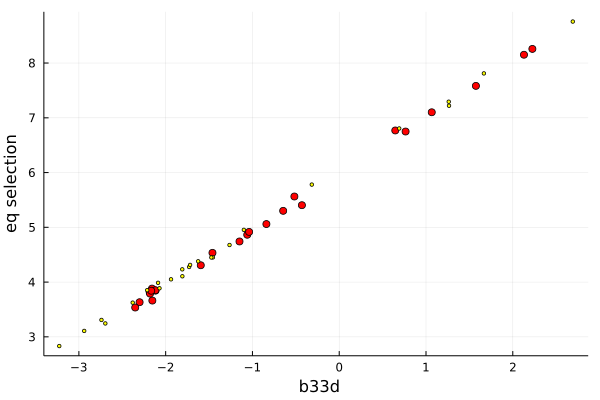

In [583]:
scatter(best_est_df_50[:,1], best_est_df_50[:,2],markersize=4, color=:red,legends=false, xlabel =" b33d", ylabel ="eq selection")
scatter!(best_est_df_100[:,1], best_est_df_100[:,2],markersize=2, color=:yellow,legends=false)

In [584]:
res_ms_150 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_150_sim_50_par_9");

est = reduce(hcat,res_ms_150["beta_hat"]')
best_est_150 = zeros(24 , 3) 
for i =1:24 
    best_est_150[i, :]=  est[:,i]'
end

best_est_df_150 = DataFrame(best_est_150, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_150, formatters = formatter, show_row_number=true) # displaying 10 estimations



res_ms_200 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_200_sim_50_par_9");

est = reduce(hcat,res_ms_200["beta_hat"]')
best_est_200 = zeros(24 , 3) 
for i =1:24 
    best_est_200[i, :]=  est[:,i]'
end

best_est_df_200 = DataFrame(best_est_200, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_200, formatters = formatter, show_row_number=true) # displaying 10 estimations

res_ms_250 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_250_sim_50_9-10_2opt");

est = reduce(hcat,res_ms_250["beta_hat"]')
best_est_250 = zeros(96 , 3) 
for i =1:96
    best_est_250[i, :]=  est[:,i]'
end

best_est_df_250 = DataFrame(best_est_250, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_250, formatters = formatter, show_row_number=true) # displaying 10 estimations


res_ms_300 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_300_sim_50_9-10_2opt");

est = reduce(hcat,res_ms_300["beta_hat"]')
best_est_300 = zeros(96 , 3) 
for i =1:96
    best_est_300[i, :]=  est[:,i]'
end

best_est_df_300 = DataFrame(best_est_300, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_300, formatters = formatter, show_row_number=true) # displaying 10 estimations






res_ms_150_2 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_150_sim_50_par_9_2");

est = reduce(hcat,res_ms_150_2["beta_hat"]')
best_est_150_2 = zeros(72 , 3) 
for i =1:72
    best_est_150_2[i, :]=  est[:,i]'
end

best_est_df_150_2 = DataFrame(best_est_150_2, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_150_2, formatters = formatter, show_row_number=true) # displaying 10 estimations




res_ms_200_2 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_200_sim_50_par_9_2");

est = reduce(hcat,res_ms_200_2["beta_hat"]')
best_est_200_2 = zeros(72 , 3) 
for i =1:72
    best_est_200_2[i, :]=  est[:,i]'
end

best_est_df_200_2 = DataFrame(best_est_200_2, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_200_2, formatters = formatter, show_row_number=true) # displaying 10 estimations

# res_ms_300 = BSON.load("/Users/amir/github/"*
#                 "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
#                 "/restricted_2par9-10/est_300_sim_25_9-10");

# est = reduce(hcat,res_ms_300["beta_hat"]')
# best_est_300 = zeros(24 , 3) 
# for i =1:24
#     best_est_300[i, :]=  est[:,i]'
# end

# best_est_df_300 = DataFrame(best_est_300, ["b33d", "eqsel", "fit"])
# pretty_table(best_est_df_300, formatters = formatter, show_row_number=true) # displaying 10 estimations



res_ms_50_alt = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_50_sim_25_par_9_mv2");

est = reduce(hcat,res_ms_50_alt["beta_hat"]')
best_est_50_alt = zeros(24 , 3) 
for i =1:24
    best_est_50_alt[i, :]=  est[:,i]'
end

best_est_df_50_alt = DataFrame(best_est_50_alt, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_50_alt, formatters = formatter, show_row_number=true) # displaying 10 estimations


res_ms_100_alt = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_100_sim_25_par_9_alt2");

est = reduce(hcat,res_ms_100_alt["beta_hat"]')
best_est_100_alt = zeros(24 , 3) 
for i =1:24
    best_est_100_alt[i, :]=  est[:,i]'
end

best_est_df_100_alt = DataFrame(best_est_100_alt, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_100_alt, formatters = formatter, show_row_number=true) # displaying 10 estimations


res_ms_300 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_300_sim_50_9-10_2opt");

est = reduce(hcat,res_ms_300["beta_hat"]')
best_est_300 = zeros(96 , 3) 
for i =1:96 
    best_est_300[i, :]=  minimum(est[:,2*i-1:2*i], dims = 2)'
end


best_est_df_300 = DataFrame(best_est_300, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_300, formatters = formatter, show_row_number=true) # displaying 10 estimations




res_ms_300all = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_300_sim_50_9-10_2opt");

est = reduce(hcat,res_ms_300all["beta_hat"]')
best_est_300all = zeros(192 , 3) 
for i =1:192
    best_est_300all[i, :]=  est[:,i]
end


best_est_df_300all = DataFrame(best_est_300all, ["b33d", "eqsel", "fit"])
pretty_table(best_est_df_300all, formatters = formatter, show_row_number=true) # displaying 10 estimations

┌─────┬─────────┬─────────┬─────────┐
│ Row │    b33d │   eqsel │     fit │
│     │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┤
│   1 │  1.6759 │  7.7141 │ -1.1649 │
│   2 │ -1.4625 │   4.488 │ -1.2443 │
│   3 │ -2.0751 │  3.9234 │  -0.705 │
│   4 │   2.388 │  8.5437 │ -1.1096 │
│   5 │   -2.64 │  3.4779 │ -0.8019 │
│   6 │  1.2705 │  7.2804 │ -1.3215 │
│   7 │   2.666 │  8.7353 │ -1.4263 │
│   8 │ -0.8475 │  5.1821 │ -1.0197 │
│   9 │ -1.3935 │  4.6384 │ -1.4045 │
│  10 │  2.3682 │  8.4902 │ -0.2397 │
│  11 │ -1.1312 │  4.8659 │ -1.2166 │
│  12 │  1.5306 │  7.6255 │  -1.168 │
│  13 │  1.2513 │  7.3061 │ -1.2067 │
│  14 │  -2.064 │  3.9978 │ -1.3928 │
│  15 │ -1.8086 │  4.2365 │ -0.3704 │
│  16 │  2.5374 │  8.6513 │  -1.249 │
│  17 │  1.9865 │  7.9717 │ -0.6211 │
│  18 │ -2.3523 │  3.6816 │ -0.8463 │
│  19 │  2.3505 │  8.3939 │ -1.0324 │
│  20 │  1.5314 │   7.581 │  -1.219 │
│  21 │  2.0631 │  8.0836 │ -1.3377 │
│  22 │ -0.8419 │  5.0816 │ -0.8833 │
│  23 │  1.9

In [585]:

res_ms_50_2opt= BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_50_sim_50_9-10_2opt")

est = reduce(hcat,res_ms_50_2opt["beta_hat"]')
# println(est)
best_est_50_2opt = zeros(96 , 3) 

for i =1:96 
    best_est_50_2opt[i, :]=  minimum(est[:,2*i-1:2*i], dims = 2)'
end


best_est_df_50_2opt = DataFrame(best_est_50_2opt, ["b33d", "eqsel", "fit"])
pretty_table(best_est_50_2opt, formatters = formatter, show_row_number=true) # displaying 10 estimations




res_ms_50_2optall= BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par9-10/est_50_sim_50_9-10_2opt")

est = reduce(hcat,res_ms_50_2optall["beta_hat"]')
# println(est)
best_est_50_2optall = zeros(192, 3) 

for i =1:192
    best_est_50_2optall[i, :]=  est[:,i]
end


best_est_df_50_2optall = DataFrame(best_est_50_2optall, ["b33d", "eqsel", "fit"])
pretty_table(best_est_50_2optall, formatters = formatter, show_row_number=true) # displaying 10 estimations





┌─────┬─────────┬─────────┬─────────┐
│ Row │  Col. 1 │  Col. 2 │  Col. 3 │
├─────┼─────────┼─────────┼─────────┤
│   1 │   4.525 │ 10.5181 │  0.2259 │
│   2 │   5.447 │ 11.3134 │  0.3761 │
│   3 │  2.9719 │  9.0325 │  0.4728 │
│   4 │  3.4015 │  9.4903 │   0.108 │
│   5 │  3.4766 │  9.6035 │   0.003 │
│   6 │  3.6655 │  9.9423 │  0.1406 │
│   7 │ -2.5345 │  3.5476 │  0.4937 │
│   8 │  4.3407 │ 10.4901 │  0.4734 │
│   9 │ -3.3756 │  2.6598 │  0.1167 │
│  10 │   3.623 │  9.6297 │  0.0406 │
│  11 │  6.1578 │ 12.1714 │  0.1831 │
│  12 │ -6.8577 │ -0.8754 │  0.5701 │
│  13 │  4.9746 │ 10.9867 │  0.1744 │
│  14 │  4.7026 │ 10.7454 │  0.2226 │
│  15 │  3.2291 │  9.2194 │  0.1729 │
│  16 │  3.7641 │  9.8325 │   0.055 │
│  17 │  4.5279 │  10.472 │  0.1096 │
│  18 │  4.1667 │ 10.1368 │ -0.0214 │
│  19 │  4.5254 │ 10.6281 │ -0.1196 │
│  20 │  5.1786 │ 11.2292 │  0.2287 │
│  21 │  4.5818 │  10.728 │  0.3435 │
│  22 │ -4.1338 │  1.8864 │  0.3136 │
│  23 │  5.7497 │ 11.9225 │  0.0673 │
│  24 │  4.4

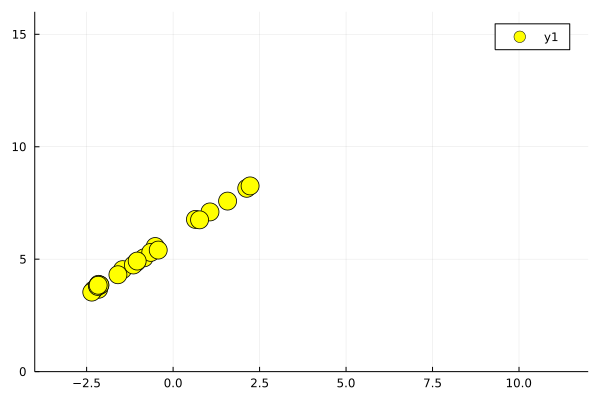

In [586]:
p1 = scatter(best_est_50[:,1],best_est_50[:,2],markersize=10,color=:yellow,xlims=(-4,12), ylims=(0,16))

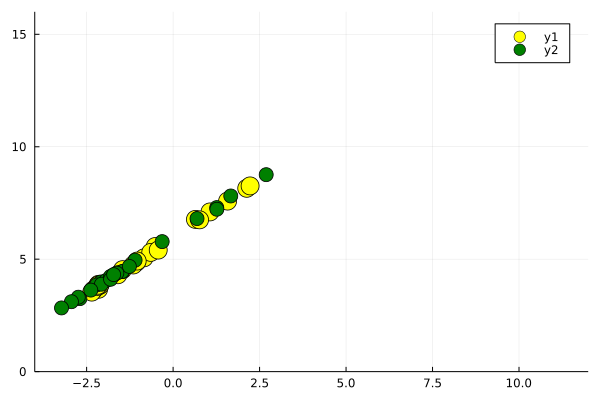

In [587]:
p2 = scatter!(best_est_100[:,1],best_est_100[:,2],markersize=8,color=:green)

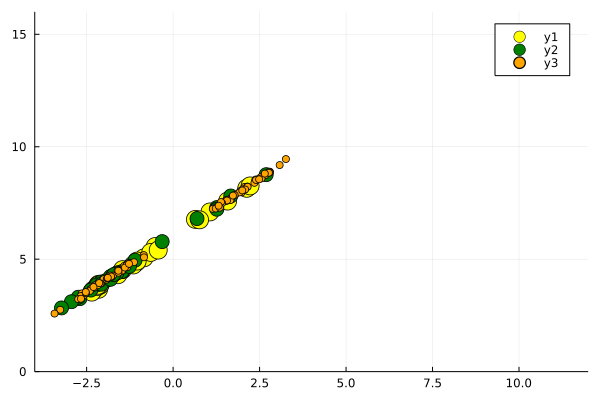

In [588]:
p3 = scatter!(vcat(best_est_150[:,1],best_est_150_2[:,1]),vcat(best_est_150[:,2], best_est_150_2[:,2]),markersize=4, color=:orange)

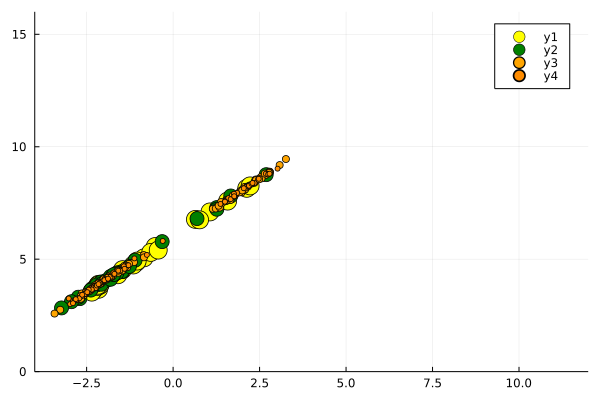

In [589]:
p4 = scatter!(vcat(best_est_200[:,1],best_est_200_2[:,1]),vcat(best_est_200[:,2], best_est_200_2[:,2]),markersize=3, color=:darkorange)

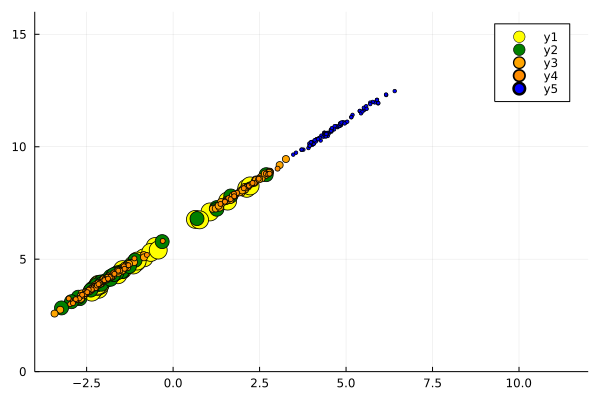

In [590]:
p5 = scatter!(best_est_250[:,1], best_est_250[:,2],markersize=2, color=:blue)

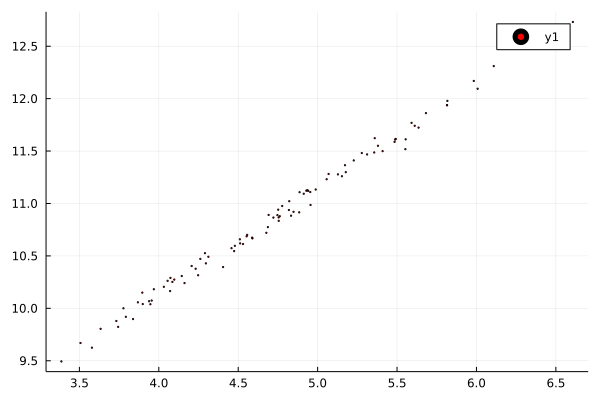

In [604]:
p6 = scatter(best_est_300[:,1], best_est_300[:,2],markersize=1, color=:red)

# plot(p1,p2,p3,p4,p5,p6, layout=(3,2),xlims=(-5,12), ylims=(0,16), markersize =2, legends=false)

## Plotting the estimated parameter versus the evaluated log-likelihood at that point

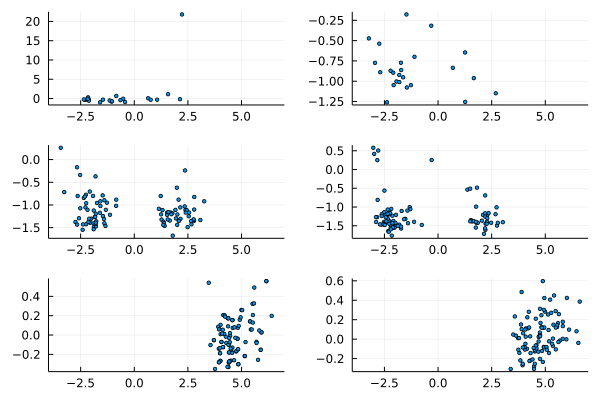

In [607]:
p1 = scatter(best_est_50[:,1],best_est_50[:,3])
p2 = scatter(best_est_100[:,1],best_est_100[:,3])
p3 = scatter(vcat(best_est_150[:,1],best_est_150_2[:,1]),vcat(best_est_150[:,3], best_est_150_2[:,3]))
p4 = scatter(vcat(best_est_200[:,1],best_est_200_2[:,1]),vcat(best_est_200[:,3], best_est_200_2[:,3]))
p5 = scatter(best_est_250[:,1], best_est_250[:,3])
p6 = scatter(best_est_300[:,1], best_est_300[:,3])
# p6 = scatter(best_est_300all[:,1], best_est_300all[:,3])


plot(p1,p2,p3,p4,p5,p6, layout=(3,2),markersize =2, legends=false, xlims= (-4,7))


In [593]:
res13_ms_50 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par1-3/est_50_sim_25_par_1-3");

est = reduce(hcat,res13_ms_50["beta_hat"]')

best_est13_50 = zeros(24 , 3) 
for i =1:24 
    best_est13_50[i, :]=  minimum(est[:,2*i-1:2*i], dims = 2)'
end

best_est13_df_50 = DataFrame(best_est13_50, ["b11u", "b13u", "fit"])
pretty_table(best_est13_df_50, formatters = formatter, show_row_number=true) # displaying 10 estimations

res13_ms_100 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par1-3/est_100_sim_25_par_1-3");

est = reduce(hcat,res13_ms_100["beta_hat"]')

best_est13_100 = zeros(24 , 3) 
for i =1:24 
    best_est13_100[i, :]=  minimum(est[:,2*i-1:2*i], dims = 2)'
end

best_est13_df_100 = DataFrame(best_est13_100, ["b11u", "b13u", "fit"])
pretty_table(best_est13_df_100, formatters = formatter, show_row_number=true) # displaying 10 estimations



res13_ms_150 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par1-3/est_150_sim_25_par_1-3");

est = reduce(hcat,res13_ms_150["beta_hat"]')

best_est13_150 = zeros(24 , 3) 
for i =1:24 
    best_est13_150[i, :]=  est[:,i]'
end

best_est13_df_150 = DataFrame(best_est13_150, ["b11u", "b13u", "fit"])
pretty_table(best_est13_df_150, formatters = formatter, show_row_number=true)


res13_ms_200 = BSON.load("/Users/amir/github/"*
                "NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist"*
                "/restricted_2par1-3/est_200_sim_25_par_1-3");

est = reduce(hcat,res13_ms_200["beta_hat"]')

best_est13_200 = zeros(24 , 3) 
for i =1:24 
    best_est13_200[i, :]=  est[:,i]'
end

best_est13_df_200 = DataFrame(best_est13_200, ["b11u", "b13u", "fit"])
pretty_table(best_est13_df_200, formatters = formatter, show_row_number=true)


┌─────┬─────────┬─────────┬─────────┐
│ Row │    b11u │    b13u │     fit │
│     │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┤
│   1 │ -2.8169 │ -1.1059 │ -0.3225 │
│   2 │ -2.6589 │ -0.8782 │  0.4463 │
│   3 │ -3.0078 │ -1.1944 │  0.1289 │
│   4 │ -3.0816 │   -0.85 │ -0.4488 │
│   5 │ -3.3554 │ -1.3499 │ -0.0496 │
│   6 │ -3.7213 │  -1.108 │ -0.0531 │
│   7 │ -2.3438 │ -1.4318 │ -0.3006 │
│   8 │ -3.5496 │ -0.6383 │ -0.4012 │
│   9 │ -2.7665 │ -1.3179 │ -0.2313 │
│  10 │ -3.2376 │ -1.4186 │ -0.3348 │
│  11 │ -2.5587 │ -1.1083 │  -0.849 │
│  12 │ -1.8946 │ -1.3301 │ -0.3961 │
│  13 │ -2.5927 │ -1.1819 │  0.1412 │
│  14 │ -3.4023 │  -0.922 │  0.1686 │
│  15 │ -1.8439 │ -1.4066 │  -0.439 │
│  16 │ -2.9887 │ -0.8971 │ -0.7275 │
│  17 │ -2.3303 │  -1.171 │ -0.5261 │
│  18 │ -2.8857 │ -0.3761 │ 21.8061 │
│  19 │ -3.2873 │ -1.1663 │ -0.9241 │
│  20 │ -2.8249 │ -1.2427 │ -0.5312 │
│  21 │ -2.5843 │ -1.3132 │ -0.4185 │
│  22 │ -2.6691 │ -1.2632 │ -1.1378 │
│  23 │ -2.8

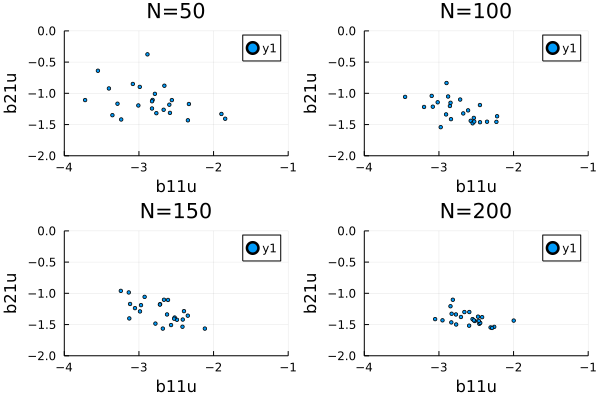

In [594]:
p1 = scatter(best_est13_df_50[:,1],best_est13_df_50[:,2], title="N=50", xlabel = "b11u", ylabel= "b21u")
p2 = scatter(best_est13_df_100[:,1],best_est13_df_100[:,2], title="N=100", xlabel = "b11u", ylabel= "b21u")
p3 = scatter(best_est13_df_150[:,1],best_est13_df_150[:,2], title="N=150", xlabel = "b11u", ylabel= "b21u")
p4 = scatter(best_est13_df_200[:,1],best_est13_df_200[:,2], title="N=200", xlabel = "b11u", ylabel= "b21u")

plot(p1,p2,p3,p4, layout=(2,2), xlims=(-4, -1), ylims=(-2, 0), markersize=2)


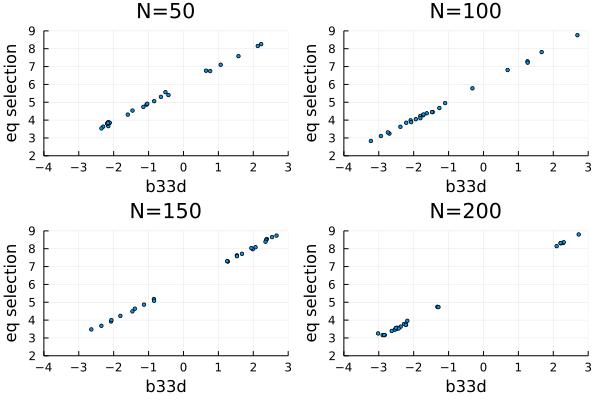

In [595]:
p1 = scatter(best_est_50[:,1],best_est_50[:,2], title="N=50", xlabel = "b33d", ylabel= "eq selection")
p2 = scatter(best_est_100[:,1],best_est_100[:,2], title="N=100", xlabel = "b33d", ylabel= "eq selection")
p3 = scatter(best_est_150[:,1],best_est_150[:,2], title="N=150", xlabel = "b33d", ylabel= "eq selection")
p4 = scatter(best_est_200[:,1],best_est_200[:,2], title="N=200", xlabel = "b33d", ylabel= "eq selection")
plot(p1,p2,p3,p4, layout=(2,2), xlims=(-4, 3), ylims=(2, 9), markersize =2, legends=false)

# Fixing equilibrium selection rule

In [612]:
function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];
    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
            sleep(0.1)
        end
    end
    bw = out["bw"]

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)

    pars10 = ["b11u", "b12u", "b21u", "b22u", "b11d", "b12d", "b21d", "b13u",  "eqsel", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10);
    return est_df, bias, MSE, m_h 
end



res_fun (generic function with 2 methods)

In [615]:
true_pars =  [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, 3, 3]

path = "/Users/amir/out/median-restb33/"*
                "est_50_sim_50_b33.bson"

b33_res_50_50, b33_bias_50_50, b33_RMSE_50_50 = res_fun(path, true_pars);

path = "/Users/amir/out/median-restb33/"*
                "est_150_sim_50_b33.bson"

b33_res_100_50, b33_bias_100_50, b33_RMSE_100_50 = res_fun(path, true_pars);






bias_mat = [hcat(b33_bias_50_50, "N=50, S=50"); 
            hcat(b33_bias_100_50, "N=100, S=50")];

pars_bias = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])",  "eqsel==$(true_pars[9])", 
            "sample and sim size"];

bias_df = DataFrame(bias_mat, pars_bias);
println("Bias, b33d is fixed at the truth")
pretty_table(bias_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations




RMSE_mat = [hcat(b33_RMSE_50_50,"N=50, S=50"); 
            hcat(b33_RMSE_100_50, "N=100, S=50")];

pars_RMSE = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "eqsel==$(true_pars[9])", 
            "eq selection rule"];
println("RMSE, b33d is fixed at the truth")

RMSE_df = DataFrame(RMSE_mat, pars_RMSE);
pretty_table(RMSE_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations


Bias, b33d is fixed at the truth
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬────────────┬─────────────────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ eqsel==3.0 │ sample and sim size │
│       Any │      Any │       Any │       Any │      Any │      Any │      Any │      Any │        Any │                 Any │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼────────────┼─────────────────────┤
│     0.271 │    0.073 │     0.275 │    -0.669 │   -0.982 │   -0.802 │    1.041 │   -1.170 │     -0.642 │          N=50, S=50 │
│    -0.136 │   -0.032 │     0.210 │    -0.303 │   -0.353 │   -0.729 │    0.332 │   -0.289 │     -0.713 │         N=100, S=50 │
└───────────┴──────────┴───────────┴───────────┴──────────┴──────────┴──────────┴──────────┴────────────┴─────────────────────┘
RMSE, b33d is fixed at the truth
┌───────────┬──────────┬───────────┬──

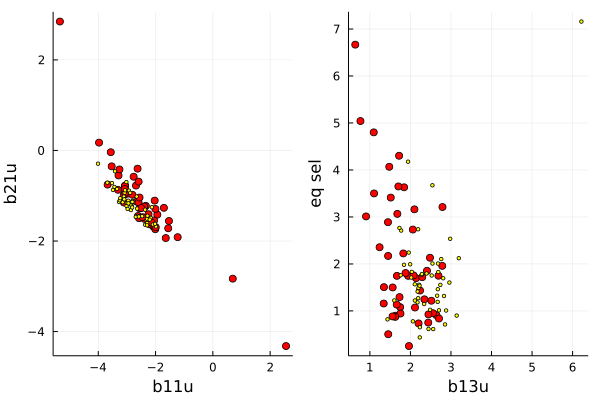

In [608]:
p1 = scatter(b33_res_50_50[:,1],b33_res_50_50[:,3], markersize =4, color=:red, xlabel = "b11u", ylabel="b21u" )
scatter!(b33_res_100_50[:,1],b33_res_100_50[:,3], markersize =2, color=:yellow)
p2 = scatter(b33_res_50_50[:,8],b33_res_50_50[:,9], markersize =4, color=:red, xlabel = "b13u", ylabel="eq sel" )
scatter!(b33_res_100_50[:,8],b33_res_100_50[:,9], markersize =2, color=:yellow)
plot(p1, p2, layout=(1,2), legends=false)

# Equilibrium selection rule is fixed at the truth

In [616]:
true_pars =  [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, 3, -3,3]

path = "/Users/amir/out/median-resteq-f/"*
               "est_50_sim_50_eqsel.bson"


eqsel_res_50_50, eqsel_bias_50_50, eqsel_RMSE_50_50 = res_fun(path, true_pars);

path = "/Users/amir/out/median-resteq-f/"*
                "est_100_sim_50_eqsel.bson"

eqsel_res_100_50, eqsel_bias_100_50, eqsel_RMSE_100_50 = res_fun(path, true_pars);






bias_mat = [hcat(eqsel_bias_50_50, "N=50, S=50"); 
            hcat(eqsel_bias_100_50, "N=100, S=50")];

pars_bias = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])",  "b33d==$(true_pars[9])", 
            "sample and sim size"];

bias_df = DataFrame(bias_mat, pars_bias);
println("Bias, eqseld is fixed at the truth")
pretty_table(bias_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations



RMSE_mat = [hcat(eqsel_RMSE_50_50,"N=50, S=50"); 
            hcat(eqsel_RMSE_100_50, "N=100, S=50")];

pars_RMSE = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d==$(true_pars[9])", 
            "eq selection rule"];
println("RMSE, 50 replications, eqseld is fixed at the truth")

RMSE_df = DataFrame(RMSE_mat, pars_RMSE);
pretty_table(RMSE_df, formatters = ft_printf("%5.3f",1:10)) # displaying 10 estimations



LoadError: KeyError: key "fitness" not found

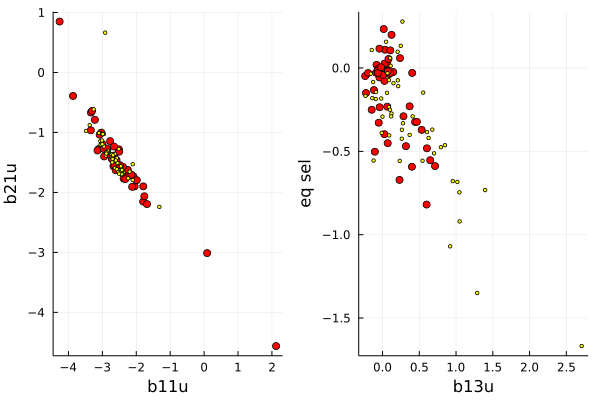

In [602]:
p1 = scatter(eqsel_res_50_50[:,1],eqsel_res_50_50[:,3], markersize =4, color=:red, xlabel = "b11u", ylabel="b21u" )
scatter!(eqsel_res_100_50[:,1],eqsel_res_100_50[:,3], markersize =2, color=:yellow)
p2 = scatter(eqsel_res_50_50[:,8],eqsel_res_50_50[:,9], markersize =4, color=:red, xlabel = "b13u", ylabel="eq sel" )
scatter!(eqsel_res_100_50[:,8],eqsel_res_100_50[:,9], markersize =2, color=:yellow)
plot(p1, p2, layout=(1,2), legends=false)


In [620]:
path= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/10p-tst/est_100_sim_50_dmode_3_bw_1.0.bson"

"/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/LogNormal Dist/10p-tst/est_100_sim_50_dmode_3_bw_1.0.bson"

In [624]:
res["beta_hat"]

96-element Vector{Any}:
 [-2.0875517358678164, 3.986502076434637, -0.8951812328790851]
 [-1.692724563460416, 4.2929327434502405, -1.0032574145460127]
 [-1.4555950243831264, 4.4511265650457865, -1.0772964522193667]
 [-1.098851568847071, 4.953844040248648, -0.6991414875319474]
 [2.4652521253244597, 8.58554373608653, -0.923334441363022]
 [1.6669802850184074, 7.810461975736549, -0.9626343736566229]
 [-2.6950469167651265, 3.2449150926424446, -0.8897931689636362]
 [-3.4386117937012792, 2.5947803777266323, -0.8334297274800022]
 [-2.1558843470802183, 3.799572433594261, -1.045173647651474]
 [-1.6504967261213668, 4.366890498893648, -0.7725308929803227]
 [-1.807518673613804, 4.106004553449604, -1.0107847507643934]
 [1.2618877321523214, 7.293942916779974, -0.6422807874056459]
 [-0.1396552519706502, 5.941331021023746, -0.2870283548930958]
 ⋮
 [1.4543521803639419, 7.555027169262088, -1.0656262662299065]
 [-2.099807961357679, 3.9659172421865, -1.124988353377003]
 [1.6735118109337703, 7.72951703616098